---
<h1><center>  lab 4 : Text Vectorization - Part 1 </center>
    
<img src="https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/assets/atap_0401.png" width="500">


>```Created by Jinnie Shin (jinnie.shin@coe.ufl.edu)```\
>```Date: ```
---

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left"> 

### Required Packages or Dependencies

In [1]:
#!pip install nbimporter #run this if you run into an error (download nbimporter)
import pandas as pd 
import numpy as np 
import nbimporter
from week3 import text_normalize


## **REVIEW**: Dataset

> Using the text_normalizer function we created last time, we will import `essay set 2`

In [3]:
normalizer = text_normalize() # call the text_normalize function and name it normalizer

_, data = normalizer.import_data(essay_set='2')
print(data)

Importing data: Essay set -  2
                                               response  score
0     [chang, the, type, of, grafin, would, improv, ...      1
1     [conclud, from, the, student, data, that, plas...      3
2     [two, way, that, the, stundent, could, 've, im...      1
3     [a, conclus, i, can, make, from, thi, experi, ...      1
4     [a.on, conclus, i, can, draw, is, that, plasti...      3
...                                                 ...    ...
1273  [a, ), we, can, conclud, that, plastic, b, is,...      3
1274  [``, a, ., one, conclus, i, have, fro, thi, da...      2
1275  [3, ., the, second, trial, (, 12, ), is, not, ...      0
1276  [a, ), i, have, conclud, that, base, on, the, ...      2
1277  [plastic, type, b, stretchabl, most, 22mm, in,...      2

[1278 rows x 2 columns]


#### Essay Set 2
`Prompt`: A student performed the following investigation to test four different polymer plastics for stretchability.
`Procedure`:
> 1. Take a sample of one type of plastic, and measure its length.
> 2. Tape the top edge of the plastic sample to a table so that it is hanging freely down the side of the table.
> 3. Attach a clamp to the bottom edge of the plastic sample.
> 4. Add weights to the clamp and allow them to hang for five minutes.
> 5. Remove the weights and clamp, and measure the length of the plastic types.
> 6. Repeat the procedure exactly for the remaining three plastic samples.
> 7. Perform a second trial (T2) exactly like the first trial (T1).

The student recorded the following data from the investigation.

`Data Table`:


|           Plastic Type    |     Amount Stretched     (mm)- T1    |   Amount Stretched     (mm)- T2         |
|---------------------------|----------------------------------|-----------|
|     A                     |     10                           |     12    |
|     B                     |     22                           |     23    |
|     C                     |     14                           |     13    |
|     D                     |     20                           |     20    |

> a.	Draw a conclusion based on the student’s data. \
> b.	Describe two ways the student could have improved the experimental design and/or validity of the results.



| Type of response            | Source dependent response |
|-----------------------------|---------------------------|
| Grade level                 | `10`                       |
| Subject                     | `Science`                   |
| Total sample size           | `1,278`                     |
| Average length of responses | `50 words`                  |
| Score range                 | `0-3`                       |


## 1. Text Vectorization 
### 1.1 Term-Document Matrix

In [4]:
# Our goal is to use the output we created above ("cleaned" column) to create a term-document matrix 
# Let's take a look at this additional function we can use "Counter"

from collections import Counter 

print(Counter([1,2,2,3,3,3,4,4,4,4])) # Counts the unique element in the given list 

print(Counter(['apple', 'apple', 'pear', 'pear', 'pear']+['cherry']*5))


Counter({4: 4, 3: 3, 2: 2, 1: 1})
Counter({'cherry': 5, 'pear': 3, 'apple': 2})


> Let's create a function called `count_vectorizer`, which takes a dataframe (`data`) as an input and produce `bow` and `unique_vocabulary` as the outputs.

In [5]:

def count_vectorizer(dataframe): #Input is the dataframe we created above with three columns 

    from collections import Counter # import the Counter function 
    
    dataframe['response'] = dataframe.response.apply(Counter).apply(dict) #we apply the counter function to the "cleaned" columns
                                                                          # we used the apply function in week 2
   
    bow = pd.DataFrame(dataframe['response'].tolist()).T.fillna(0) # we restructure the output as a dataframe and name it "bow"
                                                                  # also fill in the missing values (nan -> 0 )
    unique_vocab = list(bow.index)                                # FYI, bow standards for (bag-of-words)
    
    return bow, unique_vocab

bow, unique_vocab = count_vectorizer(data)


> *Let's explore!*


### 1.2. Term-Frequency Inverse Documenr-Frequency Matrix

       > Term-Freqeuncy: tf(t,d) = log(count(t,d)+1)
       > Inverse-Document Frequency: idf(t) = log(N/df(t))
       > TF-IDF: tf(t,d) X idf(t)

In [6]:
def tfidf_vectorizer(bow):
    
    # ======================== STEP 1 ============================ #
    
    # Step 1: we will compute the term-frequency (TF)
    
    for response in bow.columns:
        bow[response] = bow[response].apply(lambda x: np.log10(x+1))
    
    step1_output = bow
    
    # ======================== STEP 2 ============================ #
    
    # Step 2: we will compute the inverse-document frequency (IDF)
    
    df = pd.DataFrame( ( ( bow > 0 ) * 1 ).sum(axis=1), columns=['df'] )  #this is the document-freqeuncy 
    N = bow.shape[1] # this is the collection frequency (total number of doucments)
    df['IDF'] = df['df'].apply(lambda x: np.log10(N/x))
    step2_output= df
    
    # ======================== STEP 3 ============================ #
    
    # Step 3: term-freqeuncy (TF) * inverse-document frequency (IDF) = TF-IDF

    tfidf = bow.multiply(df.IDF, axis='index')
    
    return tfidf, step1_output, step2_output

> *Let's explore!*


## 2. Text Similarity

<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

> ## Task 1: Text Similarity 

> The function below (`compare_similarity`) takes in the dataframe (`data`) as an input then computes the average cosine similarity between all pairs of documents in the dataframe. You can specify the type of the matrix you want to use to compute the similarity as well (`types: {'bow', 'tfidf'}`). For example, we can do `compare_similarty(data, types='bow')`
>> Q1. Let's randomly sample 10 documents from each score category (0 to 3) and compare the average similarity for the following two vectorization approaches. Then, explain the findings briefly. 
>> - `BOW [score 0:       score 1:        score 2:          score 3:       ]`
>> - `TF-IDF [score 0:       score 1:        score 2:          score 3:       ]`



In [7]:
def cosine_similarity(v1, v2):
    import math
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
  
    sumxx, sumxy, sumyy = 0, 0, 0
   
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
   
    return sumxy/math.sqrt(sumxx*sumyy)

def compare_similarity(matrix, types='bow'):

    if types=='bow':
        bow, _ = count_vectorizer(matrix)
        final = bow 
    elif types=='tfidf':
        bow, _ = count_vectorizer(matrix)
        tfidf, _, _ = tfidf_vectorizer(bow)
        final = tfidf
    else: 
        print('we will use the default==bow')
        bow, _ = count_vectorizer(matrix)
        final = bow 

    from itertools import combinations
    sim = 0
    combi = list(combinations(list(final.columns), 2))
    for (i,j) in combi:
        temp = cosine_similarity(final[i].T, final[j].T)
        sim +=temp 
    ave_sim = sim/len(combi)
    return ave_sim


In [ ]:
##################### YOUR CODE HERE ##############################

# Average cosine similarity between the randomly sampled 10 documents in the score category 0 (using BOW)
cosine_similarity()

# Average cosine similarity between the randomly sampled 10 documents in the score category 1 (using BOW)


# Average cosine similarity between the randomly sampled 10 documents in the score category 2 (using BOW)


# Average cosine similarity between the randomly sampled 10 documents in the score category 3 (using BOW)



###################################################################

In [ ]:
##################### YOUR CODE HERE ##############################

# Average cosine similarity between the randomly sampled 10 documents in the score category 0 (using TF-IDF)


# Average cosine similarity between the randomly sampled 10 documents in the score category 1 (using TF-IDF)


# Average cosine similarity between the randomly sampled 10 documents in the score category 2 (using TF-IDF)


# Average cosine similarity between the randomly sampled 10 documents in the score category 3 (using TF-IDF)



###################################################################

## 3. Text Vector Visualization 
> An unsupervised, randomized algorithm, used only for visualization. The algorithm applies a non-linear dimensionality reduction technique where the focus is on keeping the very similar data points close together in lower-dimensional space. It preserves the local structure of the data using student t-distribution to compute the similarity between two points in lower-dimensional space.

In [9]:
#!pip install sklearn 
from sklearn.manifold import TSNE
import seaborn as sns 
from matplotlib import pyplot as pl

In [10]:
def plot_tsne(x, colors):
    tsne = TSNE()
    x = tsne.fit_transform(x)
    import seaborn as sns
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    print(palette)
    
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1],  c=palette[colors.astype(np.int)], cmap=plt.cm.get_cmap('Paired'))
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

No handles with labels found to put in legend.


[[0.86   0.3712 0.34  ]
 [0.5688 0.86   0.34  ]
 [0.34   0.8288 0.86  ]
 [0.6312 0.34   0.86  ]]


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7fb67d29deb0>)

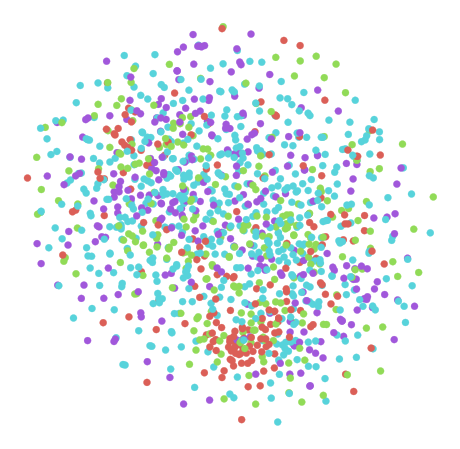

In [48]:
# First we will create a tf-idf matrix for the responses and call it X (input). Our target is the score category (Y)
X, _, _ = tfidf_vectorizer(bow.T)
y = data.score
plot_tsne( X, y)

## 4. Compile the `text_vectorizer` function 

In [1]:
class text_vectorizer():
    
    def count_vectorizer(self, data): #Input is the dataframe we created above with three columns 
        self.data = data
        
        from collections import Counter # import the Counter function 
        import pandas as pd 
        
        self.data['response'] = self.data['response'].apply(Counter).apply(dict) #we apply the counter function to the "cleaned" columns
                                                                              # we used the apply function in week 2

        self.bow = pd.DataFrame(self.data['response'].tolist()).T.fillna(0) # we restructure the output as a dataframe and name it "bow"
                                                                      # also fill in the missing values (nan -> 0 )
        self.unique_vocab = list(self.bow.index)                                # FYI, bow standards for (bag-of-words)

        return self.bow, self.unique_vocab

    def tfidf_vectorizer(self, data):
        self.data = data
        
        import pandas as pd 
        for response in self.bow.columns:
            self.bow[response] = self.bow[response].apply(lambda x: np.log10(x+1))

        df = pd.DataFrame( ( ( bow > 0 ) * 1 ).sum(axis=1), columns=['df'] )  #this is the document-freqeuncy 
        N = self.bow.shape[1] # this is the collection frequency (total number of doucments)
        df['IDF'] = df['df'].apply(lambda x: np.log10(N/x))

        self.tfidf = bow.multiply(df.IDF, axis='index')

        return self.tfidf

> *Let's explore!*

In [2]:
vectorizer = text_vectorizer() #call the vectorizer (class)
bow, vocab = vectorizer.count_vectorizer(data) #count_vectorizer
tfidf = vectorizer.tfidf_vectorizer(data) #tifdf_vectorizer 


NameError: name 'data' is not defined